In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

- gender
Gender- Male='M',Female='F'

- ssc_p
Secondary Education percentage- 10th Grade

- ssc_b
Board of Education- Central/ Others

- hsc_p
Higher Secondary Education percentage- 12th Grade

- hsc_b
Board of Education- Central/ Others

- hsc_s
Specialization in Higher Secondary Education

- degree_p
Degree Percentage

- degree_t
Under Graduation

- workex
Work Experience(Degree type)- Field of degree education




In [4]:
Data = pd.read_csv('/content/Placement_Data_Full_Class.csv')
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


## Status 기준 (취업여부 기준) 

In [5]:
data = Data.copy()
del data['salary']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
dtypes: float64(5), int64(1), object(8)
memory usage: 23.6+ KB


In [6]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [7]:
data.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000


In [8]:
data.describe(include=['O'])

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
count,215,215,215,215,215,215,215,215
unique,2,2,2,3,3,2,2,2
top,M,Central,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
freq,139,116,131,113,145,141,120,148


In [9]:
print(data['ssc_b'].unique())
print(data['hsc_b'].unique())
print(data['hsc_s'].unique())
print(data['degree_t'].unique())
print(data['specialisation'].unique())

['Others' 'Central']
['Others' 'Central']
['Commerce' 'Science' 'Arts']
['Sci&Tech' 'Comm&Mgmt' 'Others']
['Mkt&HR' 'Mkt&Fin']


In [76]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [16]:
list(data)

['sl_no',
 'gender',
 'ssc_p',
 'ssc_b',
 'hsc_p',
 'hsc_b',
 'hsc_s',
 'degree_p',
 'degree_t',
 'workex',
 'etest_p',
 'specialisation',
 'mba_p',
 'status']

In [22]:
X = data[list(data)[:-1]]
y = data['status']


list(X)

['sl_no',
 'gender',
 'ssc_p',
 'ssc_b',
 'hsc_p',
 'hsc_b',
 'hsc_s',
 'degree_p',
 'degree_t',
 'workex',
 'etest_p',
 'specialisation',
 'mba_p']

In [45]:
label = LabelEncoder()
y = label.fit_transform(data['status'])

In [48]:
num_columns = ['sl_no', 'ssc_p', 'hsc_p','degree_p','etest_p','mba_p']
cgr_columns = ['gender', 'ssc_b','hsc_b','workex','specialisation','hsc_s', 'degree_t']

In [77]:
num_pipeline = Pipeline([
                         ('imputer', SimpleImputer(strategy='median')),
                         ('scaler', StandardScaler())
])

In [78]:
cgr_pipeline = Pipeline([
                         ('onehot', OneHotEncoder())
])

In [79]:
df_pipeline = ColumnTransformer([
                                 ('num_pipeline', num_pipeline, num_columns),
                                 ('cgr_pipeline', cgr_pipeline, cgr_columns)
])

In [80]:
X.shape, y.shape

((215, 13), (215,))

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 13, test_size = 0.2)

In [82]:
X_train.shape, X_test.shape, y_train.shape

((172, 13), (43, 13), (172,))

In [83]:
one_hot = OneHotEncoder()
one_hot.fit(X[cgr_columns])
X_cgr = one_hot.categories_
X_cgr

[array(['F', 'M'], dtype=object),
 array(['Central', 'Others'], dtype=object),
 array(['Central', 'Others'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Mkt&Fin', 'Mkt&HR'], dtype=object),
 array(['Arts', 'Commerce', 'Science'], dtype=object),
 array(['Comm&Mgmt', 'Others', 'Sci&Tech'], dtype=object)]

In [84]:
X_train = df_pipeline.fit_transform(X_train)
X_test = df_pipeline.transform(X_test)

___
### Ridge

In [85]:
X_train.shape

(172, 22)

In [86]:
data.corr()['status'].abs().sort_values(ascending = False)

status      1.000000
ssc_p       0.607889
hsc_p       0.491228
degree_p    0.479861
etest_p     0.127639
mba_p       0.076922
sl_no       0.026859
Name: status, dtype: float64

In [87]:
from sklearn.linear_model import Ridge

In [88]:
ridge = Ridge().fit(X_train, y_train)
ridge.score(X_train, y_train), ridge.score(X_test, y_test)

(0.5602798922314136, 0.5273038976229503)

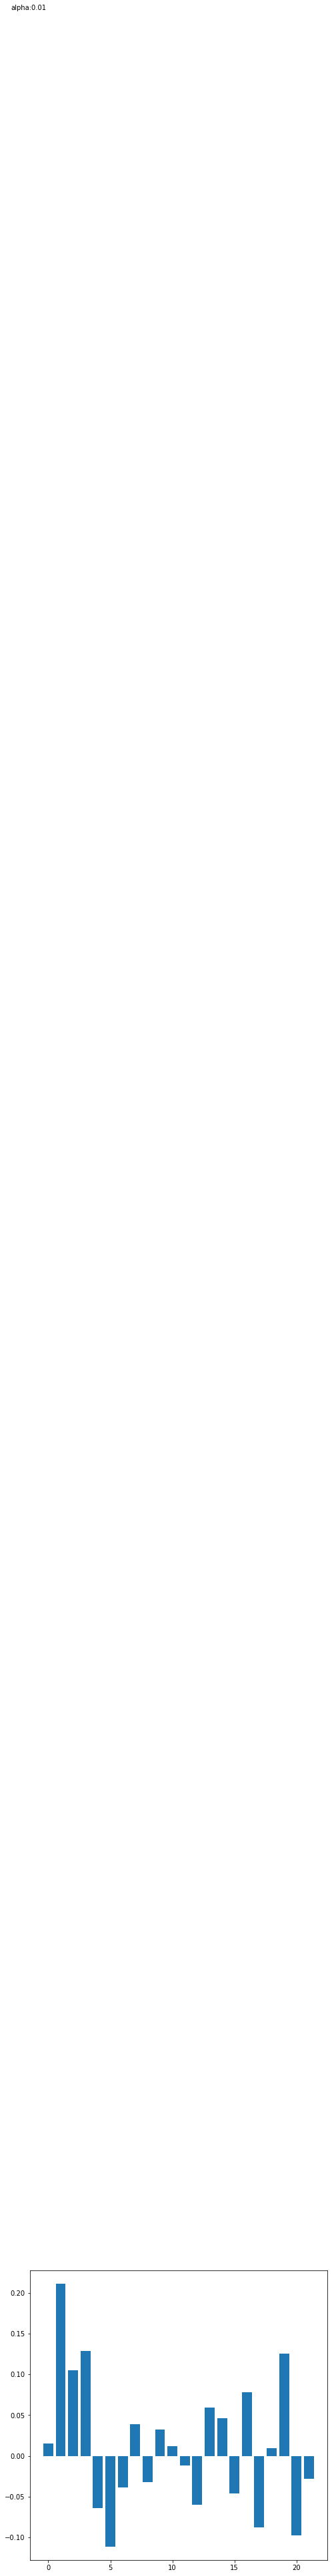

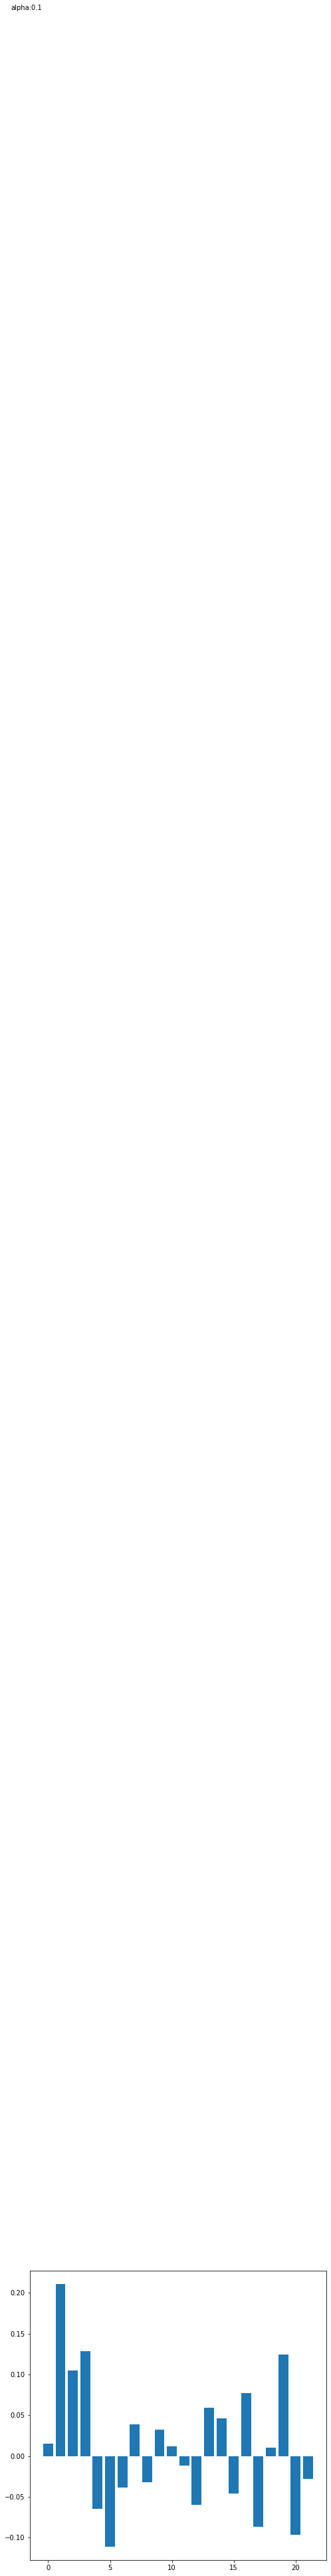

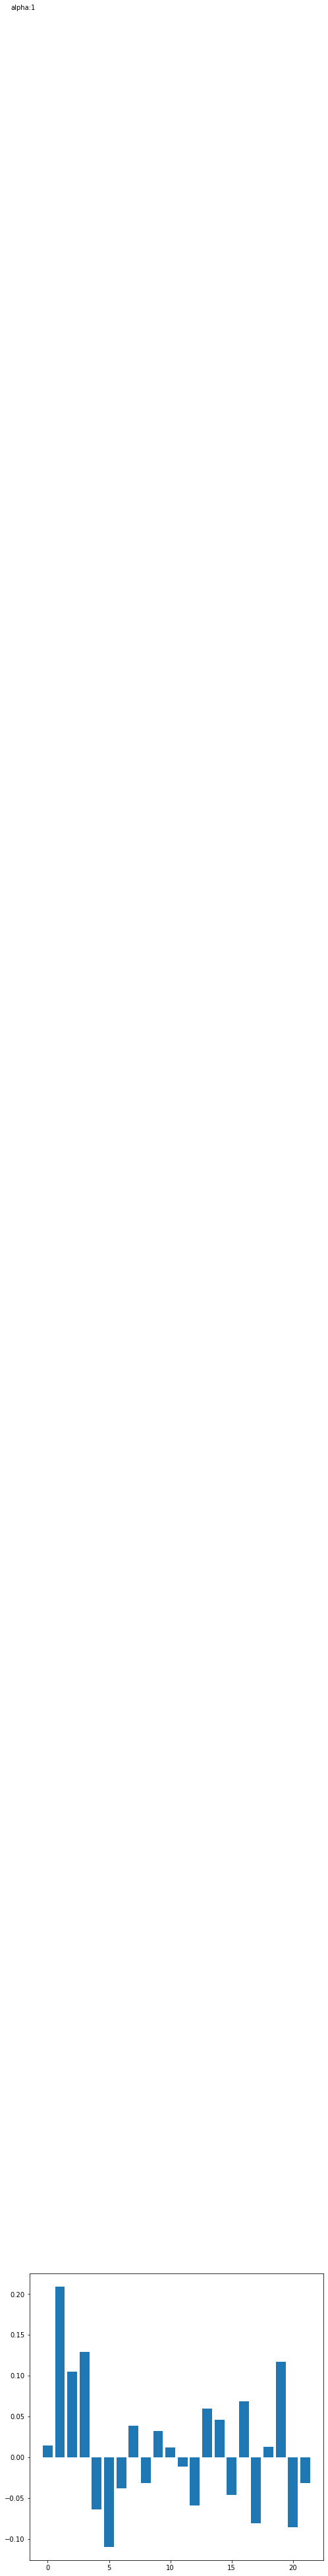

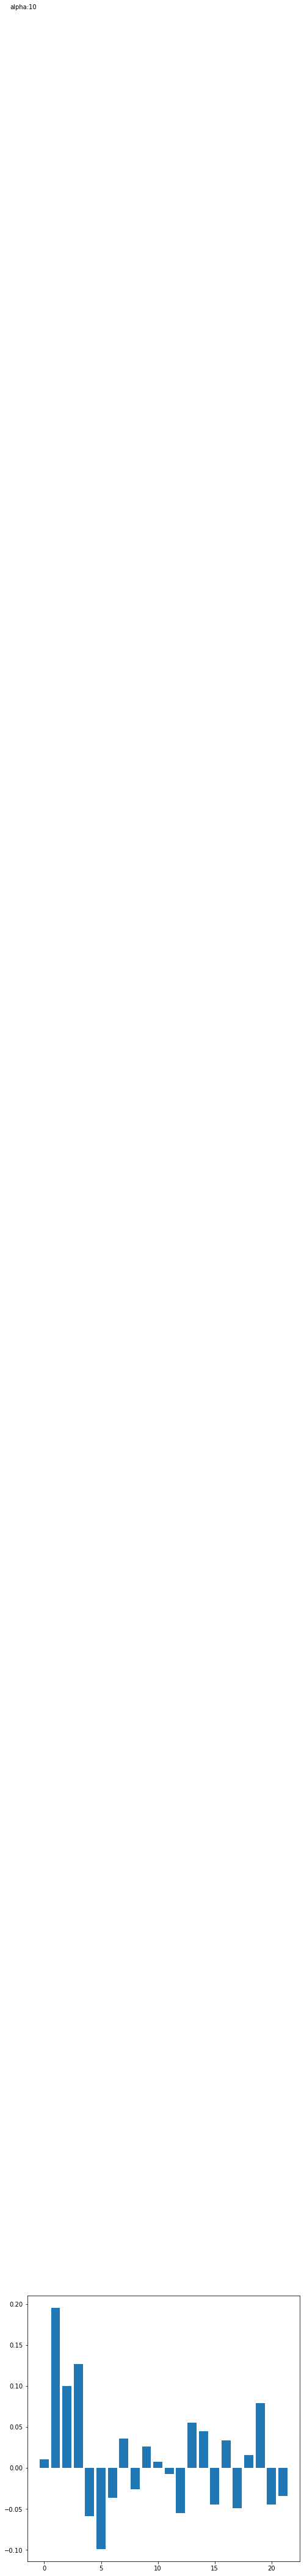

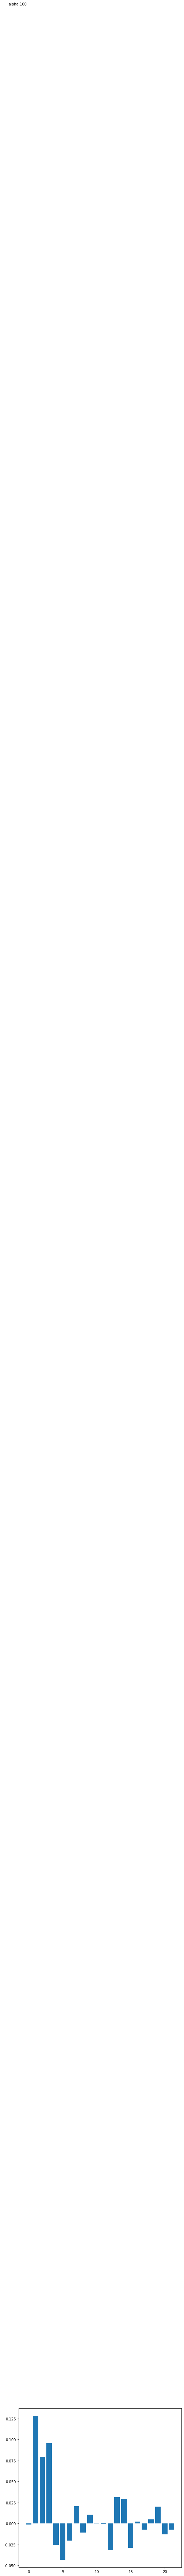

In [89]:
ridge = None
alpha_list = [0.01, 0.1, 1, 10, 100]
best_score = -1 #초기값 아무거나ㅣ
ridge_best_params = {'alpha':0}

result = {
    'alpha': [],
    'score' : []

}
for alpha in alpha_list:
  ridge = Ridge(alpha = alpha)
  ridge.fit(X_train, y_train)
  plt.figure(figsize = (8,8))
  plt.bar(range(ridge.coef_.shape[0]), ridge.coef_)
  plt.text(-3,3, 'alpha:{}'.format(alpha))
  result['alpha'].append(alpha)
  result['score'].append((ridge.score(X_train, y_train),ridge.score(X_test, y_test)))
  score = ridge.score(X_train, y_train)
  if best_score < score:
    best_score = score
    ridge_best_params['alpha'] = alpha

  plt.show()


In [90]:
ridge_best_params

{'alpha': 0.01}

In [91]:
best_score

0.5603814557975151

In [92]:
result

{'alpha': [0.01, 0.1, 1, 10, 100],
 'score': [(0.5603814557975151, 0.5257639614438065),
  (0.5603802645412851, 0.5259393894649211),
  (0.5602798922314136, 0.5273038976229503),
  (0.5561077598907813, 0.528372177696679),
  (0.48502800703529375, 0.47198332855474684)]}

---
Lasso

In [93]:
from sklearn.linear_model import Lasso
lasso = Lasso()

<BarContainer object of 22 artists>

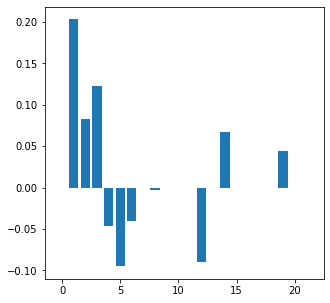

In [94]:
lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train)

plt.figure(figsize = (5,5))
plt.bar(range(ridge.coef_.shape[0]), lasso.coef_)

### L1 Feature Selection

In [95]:
X, y

(     sl_no gender  ssc_p    ssc_b  ...  workex etest_p specialisation  mba_p
 0        1      M  67.00   Others  ...      No    55.0         Mkt&HR  58.80
 1        2      M  79.33  Central  ...     Yes    86.5        Mkt&Fin  66.28
 2        3      M  65.00  Central  ...      No    75.0        Mkt&Fin  57.80
 3        4      M  56.00  Central  ...      No    66.0         Mkt&HR  59.43
 4        5      M  85.80  Central  ...      No    96.8        Mkt&Fin  55.50
 ..     ...    ...    ...      ...  ...     ...     ...            ...    ...
 210    211      M  80.60   Others  ...      No    91.0        Mkt&Fin  74.49
 211    212      M  58.00   Others  ...      No    74.0        Mkt&Fin  53.62
 212    213      M  67.00   Others  ...     Yes    59.0        Mkt&Fin  69.72
 213    214      F  74.00   Others  ...      No    70.0         Mkt&HR  60.23
 214    215      M  62.00  Central  ...      No    89.0         Mkt&HR  60.22
 
 [215 rows x 13 columns],
 array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0

In [96]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.1, penalty = 'l1', dual=False).fit(X_train, y_train)
model = SelectFromModel(lsvc, prefit = True)

selected_idx = model.get_support()
X_train_new = model.transform(X_train)
X_test_new = model.transform(X_test)
X_train_new.shape

(172, 9)

In [97]:
selected_idx

array([False,  True,  True,  True,  True,  True, False,  True, False,
       False, False, False, False,  True,  True, False, False, False,
       False,  True, False, False])

In [98]:
num_columns = ['sl_no', 'ssc_p', 'hsc_p','degree_p','etest_p','mba_p']
cgr_columns = ['gender', 'ssc_b','hsc_b','workex','specialisation','hsc_s', 'degree_t']

In [99]:
cgr_name = []
for cgr in cgr_columns:
  arr = data[cgr].unique()
  for i in range(len(arr)):
    cgr_name.append('{}_{}'.format(cgr,arr[i]))

onehot_col = num_columns + cgr_name
onehot_col

['sl_no',
 'ssc_p',
 'hsc_p',
 'degree_p',
 'etest_p',
 'mba_p',
 'gender_M',
 'gender_F',
 'ssc_b_Others',
 'ssc_b_Central',
 'hsc_b_Others',
 'hsc_b_Central',
 'workex_No',
 'workex_Yes',
 'specialisation_Mkt&HR',
 'specialisation_Mkt&Fin',
 'hsc_s_Commerce',
 'hsc_s_Science',
 'hsc_s_Arts',
 'degree_t_Sci&Tech',
 'degree_t_Comm&Mgmt',
 'degree_t_Others']

In [100]:
df_X_train = pd.DataFrame(X_train)
df_X_train.set_axis(onehot_col, axis = 1, inplace=True)
df_X_train.head()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_M,gender_F,ssc_b_Others,ssc_b_Central,hsc_b_Others,hsc_b_Central,workex_No,workex_Yes,specialisation_Mkt&HR,specialisation_Mkt&Fin,hsc_s_Commerce,hsc_s_Science,hsc_s_Arts,degree_t_Sci&Tech,degree_t_Comm&Mgmt,degree_t_Others
0,-0.206703,1.649739,2.206052,2.039827,1.630171,0.974665,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.541272,0.145963,-0.147829,-1.253144,0.143279,-1.122344,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,-0.142557,-0.887884,-0.430295,-0.331112,-1.353003,-1.264659,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.354574,1.555753,0.605413,0.854358,0.299794,1.883426,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,-1.489620,-0.887884,-0.524450,-0.857987,-0.717553,-0.256449,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [101]:
data.describe(include='all')

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
count,215.000000,215,215.000000,215,215.000000,215,215,215.000000,215,215,215.000000,215,215.000000,215.000000
unique,NaN,2,NaN,2,NaN,2,3,NaN,3,2,NaN,2,NaN,NaN
top,NaN,M,NaN,Central,NaN,Others,Commerce,NaN,Comm&Mgmt,No,NaN,Mkt&Fin,NaN,NaN
freq,NaN,139,NaN,116,NaN,131,113,NaN,145,141,NaN,120,NaN,NaN
mean,108.000000,NaN,67.303395,NaN,66.333163,NaN,NaN,66.370186,NaN,NaN,72.100558,NaN,62.278186,0.688372
std,62.209324,NaN,10.827205,NaN,10.897509,NaN,NaN,7.358743,NaN,NaN,13.275956,NaN,5.833385,0.464240
min,1.000000,NaN,40.890000,NaN,37.000000,NaN,NaN,50.000000,NaN,NaN,50.000000,NaN,51.210000,0.000000
25%,54.500000,NaN,60.600000,NaN,60.900000,NaN,NaN,61.000000,NaN,NaN,60.000000,NaN,57.945000,0.000000
50%,108.000000,NaN,67.000000,NaN,65.000000,NaN,NaN,66.000000,NaN,NaN,71.000000,NaN,62.000000,1.000000
75%,161.500000,NaN,75.700000,NaN,73.000000,NaN,NaN,72.000000,NaN,NaN,83.500000,NaN,66.255000,1.000000


In [102]:
for i in range(len(selected_idx)):
  if selected_idx[i]:
    print(onehot_col[i])

ssc_p
hsc_p
degree_p
etest_p
mba_p
gender_F
workex_Yes
specialisation_Mkt&HR
degree_t_Sci&Tech


In [103]:
lsvc.fit(X_train_new, y_train)
lsvc.score(X_train_new, y_train), lsvc.score(X_test_new, y_test)

(0.8895348837209303, 0.8604651162790697)

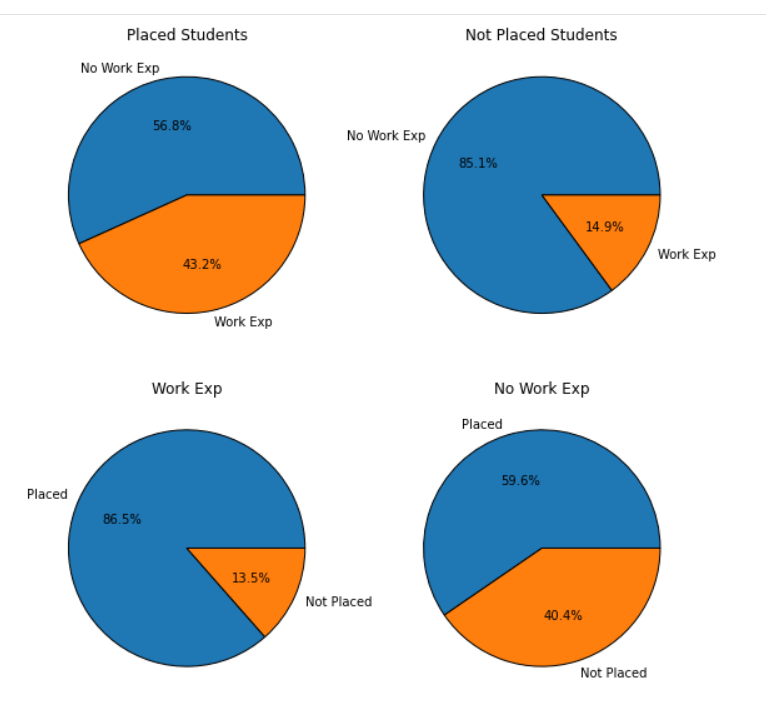

## PCA

In [110]:
!pip install mglearn

In [107]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 2) #주성분 개수 2개

#pca 모델 학습: X_data만 필요
pca.fit(X_train)

#학습도니 pca 모델을 이용해 data 변환: 차원 축소
data_pca = pca.transform(X_train)
print("원본 데이터의 형태: ", str(X_train.shape))
print("축소된 데이터의 형태: ", str(data_pca.shape))

원본 데이터의 형태:  (172, 22)
축소된 데이터의 형태:  (172, 2)


In [120]:
ridge = Ridge().fit(X_train, y_train)
ridge.score(X_train, y_train), ridge.score(X_test, y_test)

0.5602798922314136

In [122]:
ridge = Ridge().fit(data_pca, y_train)
ridge.score(data_pca, y_train)

0.3044170637158863

In [114]:
import mglearn

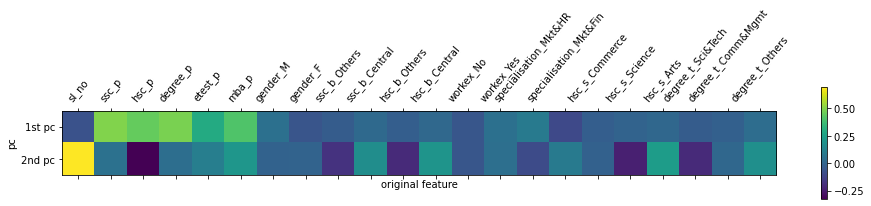

In [125]:
plt.matshow(pca.components_, cmap = 'viridis') #heatmap

plt.xticks(range(len(onehot_col)), onehot_col, rotation =50) #회전
plt.yticks([0,1], ["1st pc", "2nd pc"])

plt.xlabel('original feature')
plt.ylabel('pc')

plt.colorbar()
plt.show()


In [123]:
X_train.shape

(172, 22)

In [127]:
pca = PCA(n_components = 10)
pca_data = pca.fit_transform(X_train)

In [129]:
ridge = Ridge().fit(pca_data, y_train)
ridge.score(pca_data, y_train)

0.5433468834823169

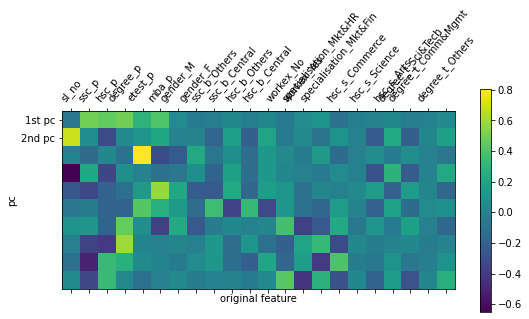

In [130]:
plt.matshow(pca.components_, cmap = 'viridis') #heatmap

plt.xticks(range(len(onehot_col)), onehot_col, rotation =50) #회전
plt.yticks([0,1], ["1st pc", "2nd pc"])

plt.xlabel('original feature')
plt.ylabel('pc')

plt.colorbar()
plt.show()